In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
img=data.camera()

def paddingZero(_img,_size):#填充 避免损失边界信息
    h = _img.shape[0]+2*int((_size-1)/2)
    w = _img.shape[1]+2*int((_size-1)/2)
    n = np.zeros((h,w))
    start_0 = int((_size-1)/2)
    end_0 = int((_size-1)/2)+_img.shape[0]
    start_1 = int((_size-1)/2)
    end_1 = int((_size-1)/2)+_img.shape[1]
    n[start_0:end_0,start_1:end_1] = _img
    return n

In [2]:
def Gaussian_filter(_img,category):
    height=img.shape[0]
    width=img.shape[1]
    if category==0:
        template = np.array([
         [1,2,3,2,1],
         [2,5,6,5,2],
         [3,6,8,6,3],
         [2,5,6,5,2],
         [1,2,3,2,1]
         ])
    else:
        template = np.array([
        [1,4,7,4,1],
        [4,16,26,16,4],
        [7,26,41,26,7],
        [4,16,26,16,4],
        [1,4,7,4,1]
        ])
    t_size=5
    img_padded = paddingZero(img,t_size)
    test = np.zeros_like(img,dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            window = img_padded[i:i+t_size,j:j+t_size]
            window = window * template
            pixel = np.sum(window)/np.sum(template)
            pixel = int(pixel)
            test[i,j]=pixel
    return test

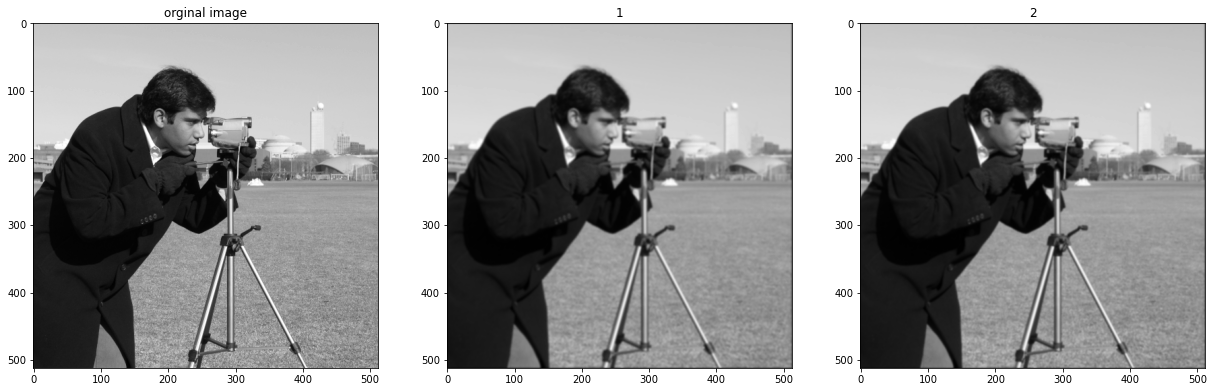

In [4]:
fig = plt.figure(figsize=(21,9))
org = fig.add_subplot(1,3,1)
org.imshow(img,cmap='gray')
org.set_title("orginal image")

test1_img = fig.add_subplot(1,3,2)
test1_img.imshow(Gaussian_filter(img,0),cmap='gray')#参数catagory 0为课上模板1为书上模板
test1_img.set_title("1")

test2_img = fig.add_subplot(1,3,3)
test2_img.imshow(Gaussian_filter(img,1),cmap='gray')
test2_img.set_title("2")
plt.show()